In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/Eric/MachineLearning/credit_card_default.csv') # read in the csv file
df.rename(index={24: "default"})
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [13]:
df.describe()
print (df.dtypes)
print (df.info())

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data colum

In [14]:
df_sub_corr1 = df[["default payment next month","LIMIT_BAL","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]]
df_sub_corr1.head()

default payment next month  LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0                           1      20000   24      2      2     -1     -1   
1                           1     120000   26     -1      2      0      0   
2                           0      90000   34      0      0      0      0   
3                           0      50000   37      0      0      0      0   
4                           0      50000   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  
0          0  
1       3261  
2      15549  
3      29547  
4      19131

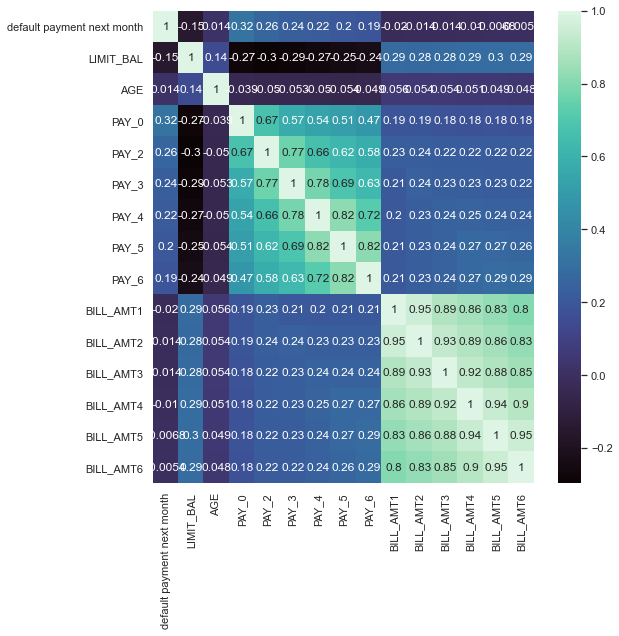

In [15]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# plot the correlation matrix using seaborn
sns.set(style="whitegrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_sub_corr1.corr(), cmap='mako', annot=True)

f.tight_layout()

In [16]:
df_sub_PAY = df[["default payment next month","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]] #splitting attributes based on high correlation
df_sub_BILL = df[["default payment next month","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]]

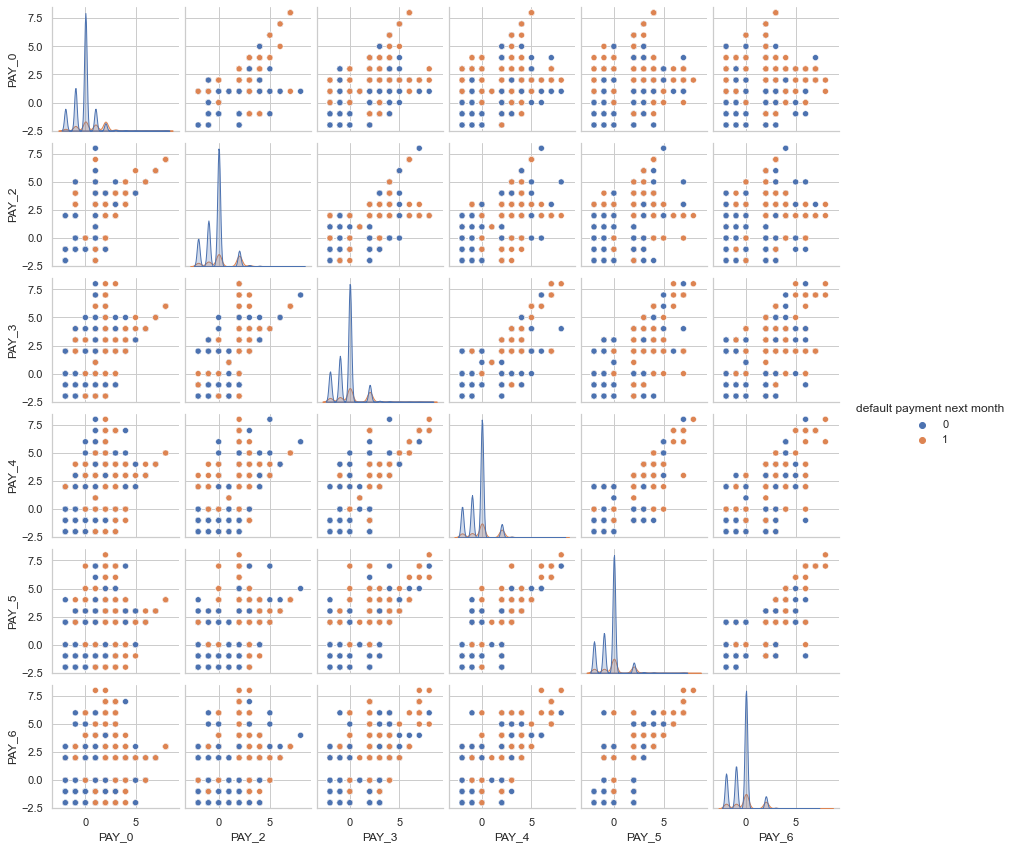

In [11]:
import seaborn as sns
sns.pairplot(df_sub_PAY, hue="default payment next month", height=2)

<AxesSubplot:xlabel='PAY_6', ylabel='PAY_5'>

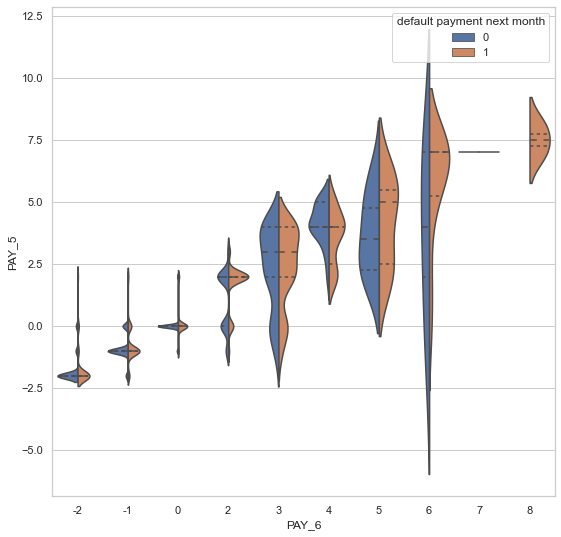

In [22]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="PAY_6", y="PAY_5", hue="default payment next month", data=df_sub_PAY, 
               split=True, inner="quart")

<AxesSubplot:xlabel='PAY_0', ylabel='PAY_2'>

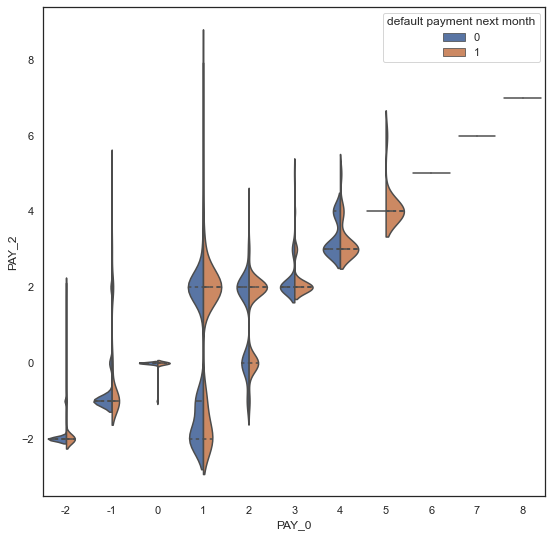

In [35]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="PAY_0", y="PAY_2", hue="default payment next month", data=df_sub_PAY, 
               split=True, inner="quart")

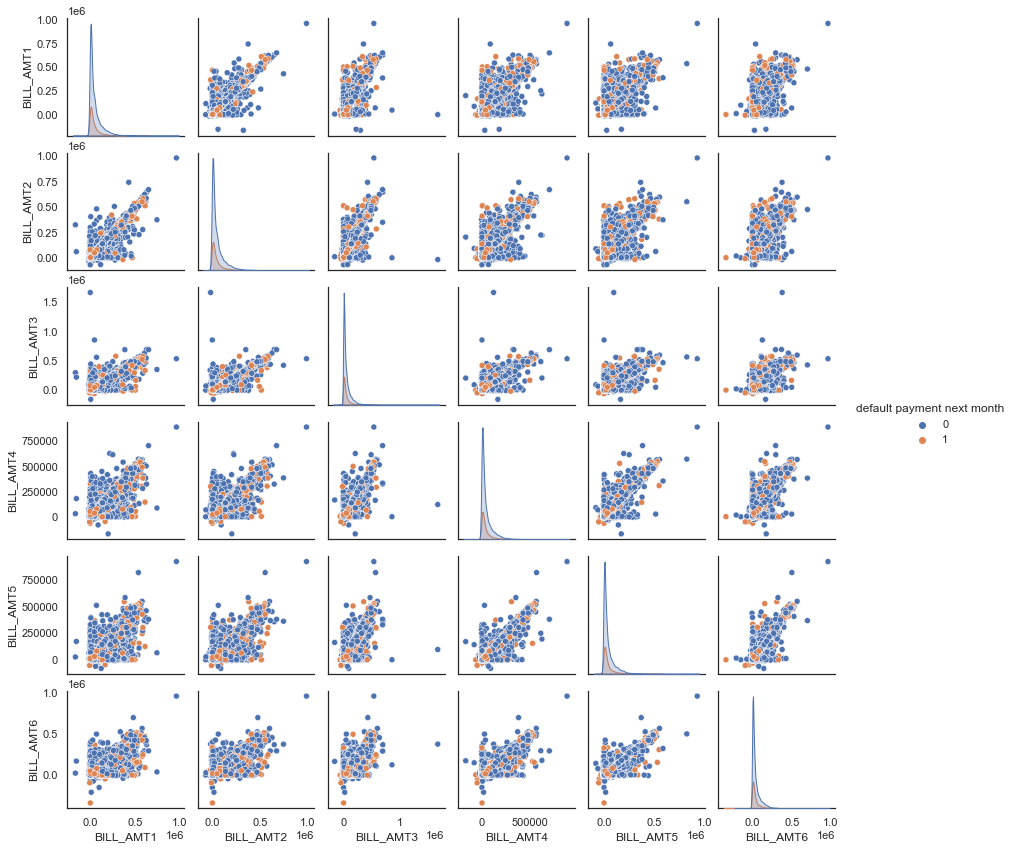

In [26]:
sns.pairplot(df_sub_BILL, hue="default payment next month", height=2)

<AxesSubplot:xlabel='BILL_AMT5', ylabel='BILL_AMT6'>

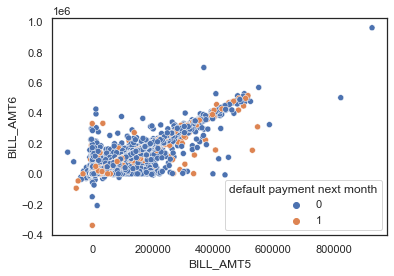

In [32]:
sns.scatterplot(data=df_sub_BILL, x="BILL_AMT5", y="BILL_AMT6", hue="default payment next month")

<AxesSubplot:xlabel='PAY_0', ylabel='PAY_2'>

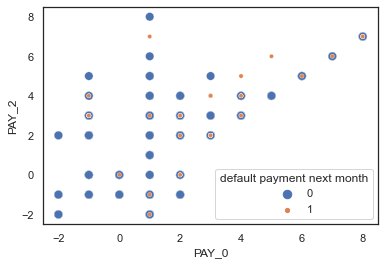

In [40]:
sns.scatterplot(data=df_sub_PAY, x="PAY_0", y="PAY_2", hue="default payment next month", size="default payment next month")

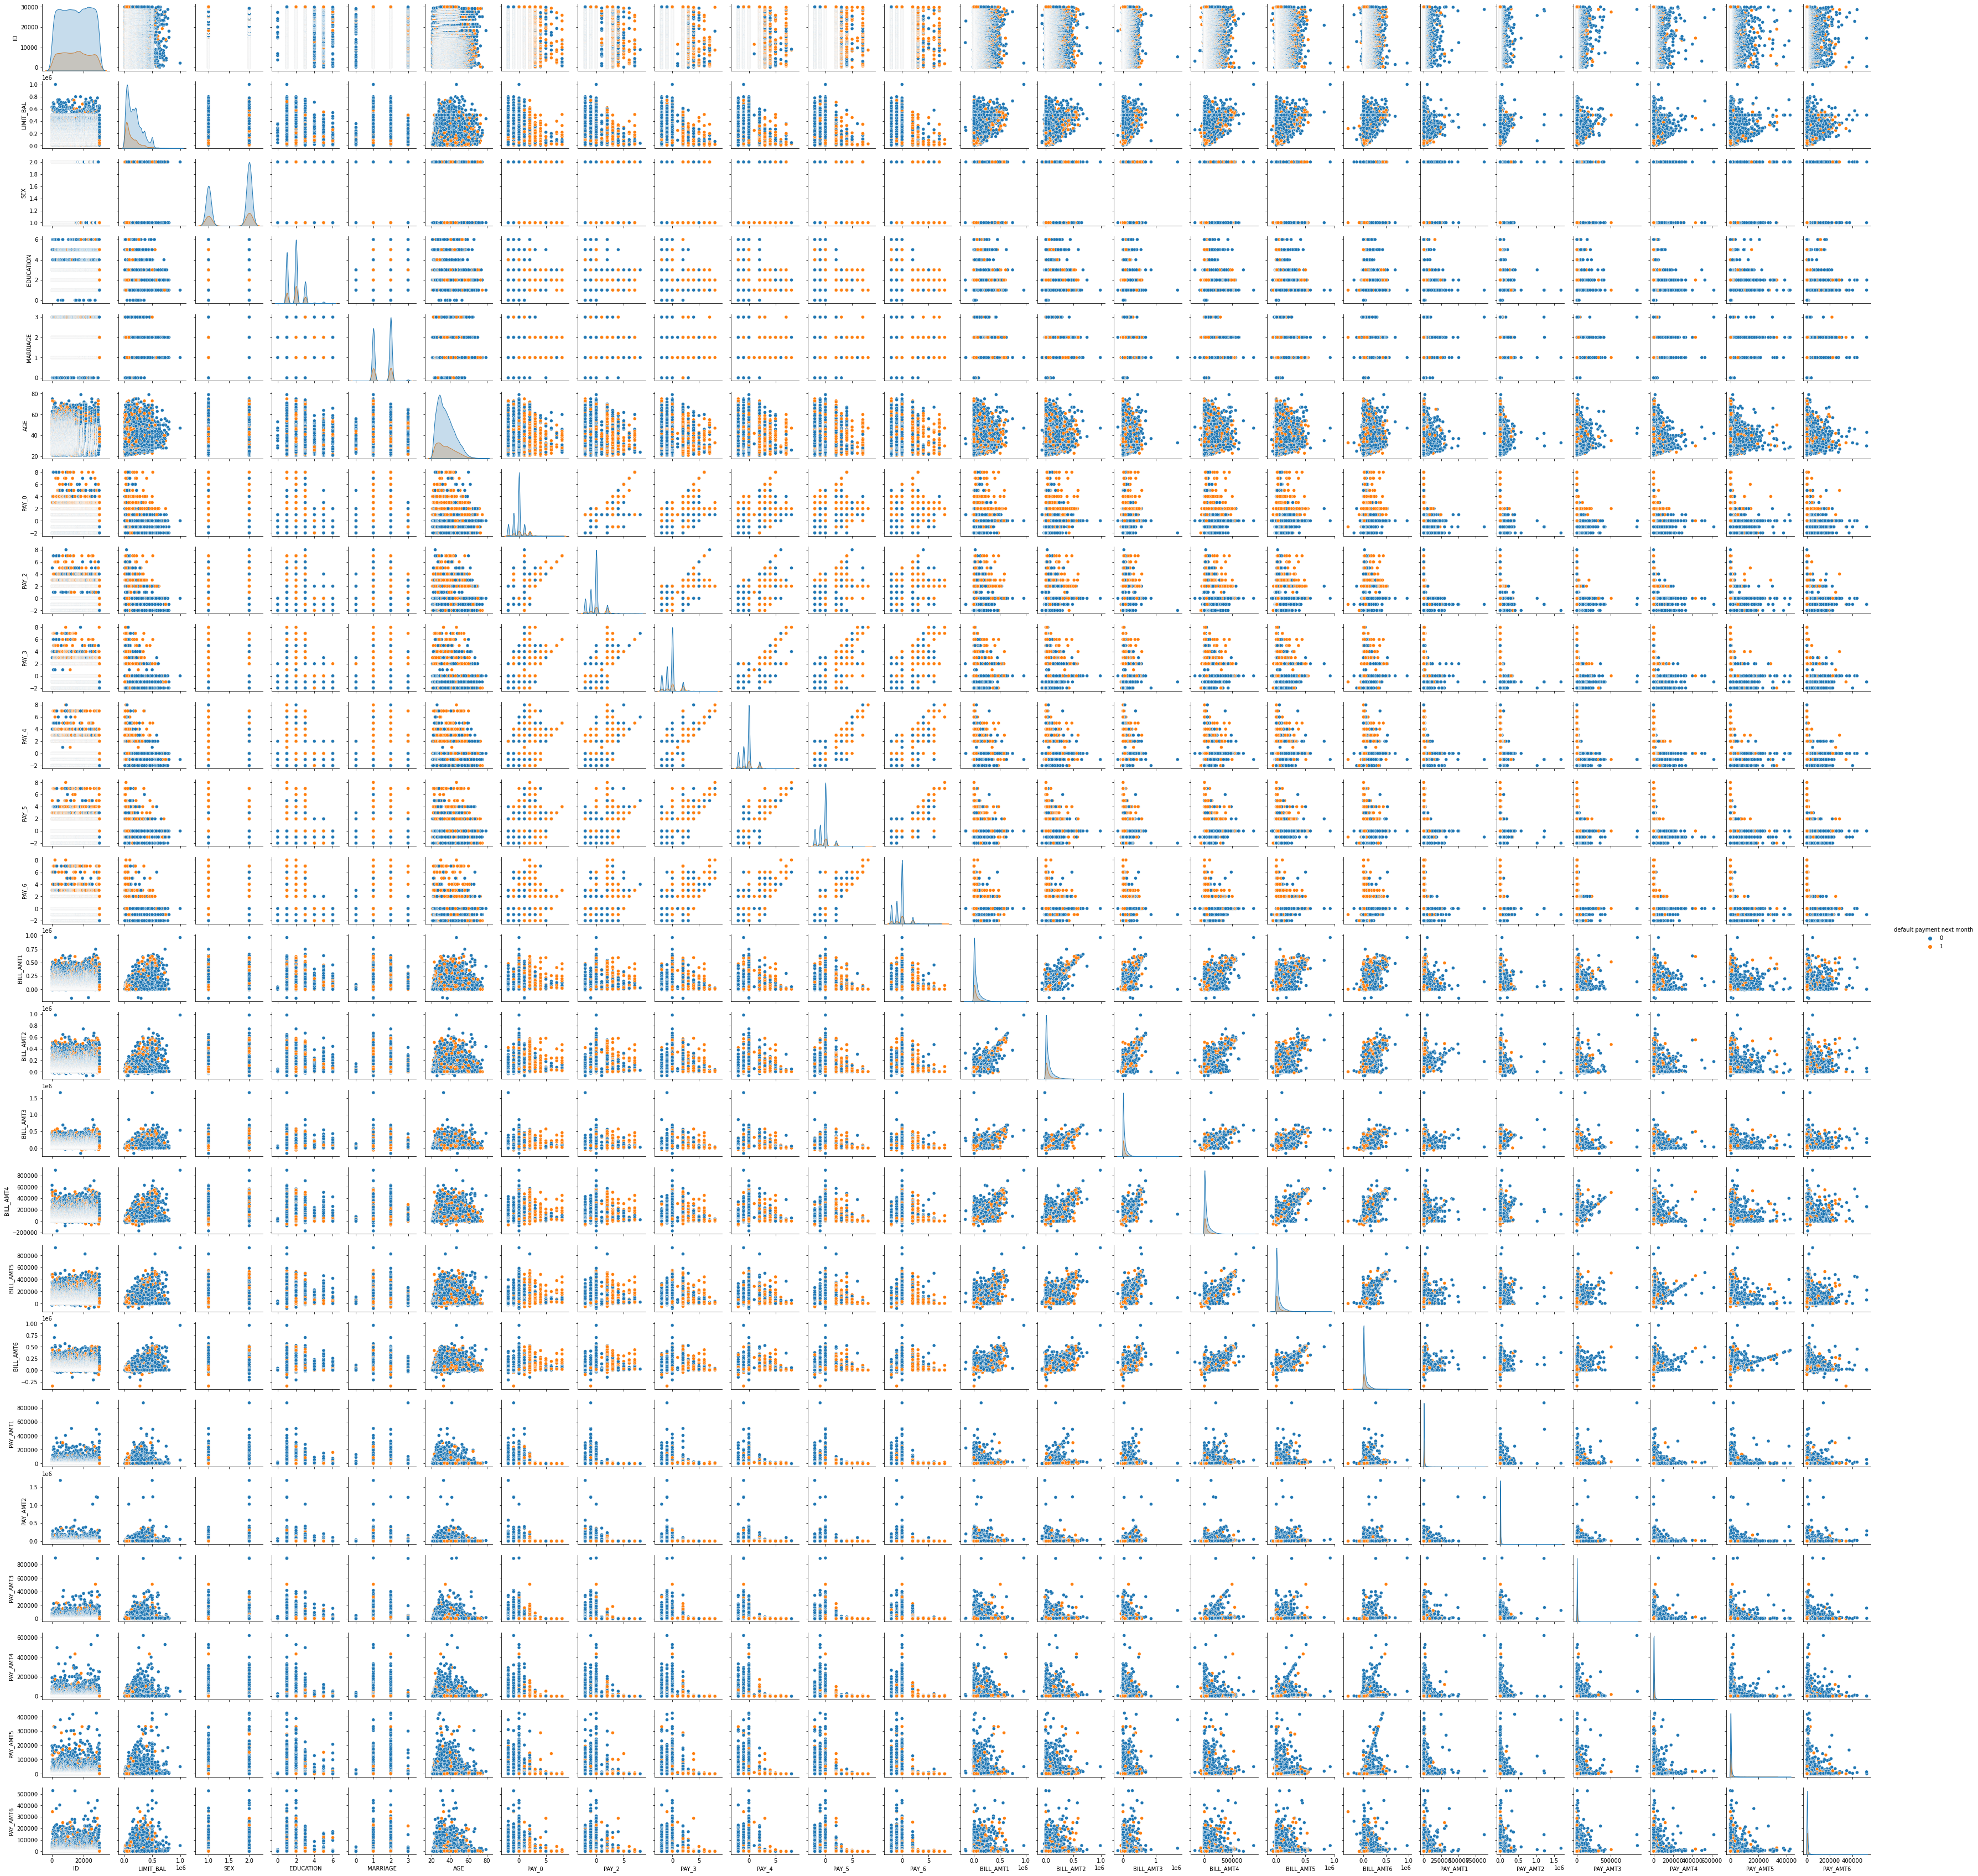

In [85]:
sns.pairplot(df, hue="default payment next month", height=2)

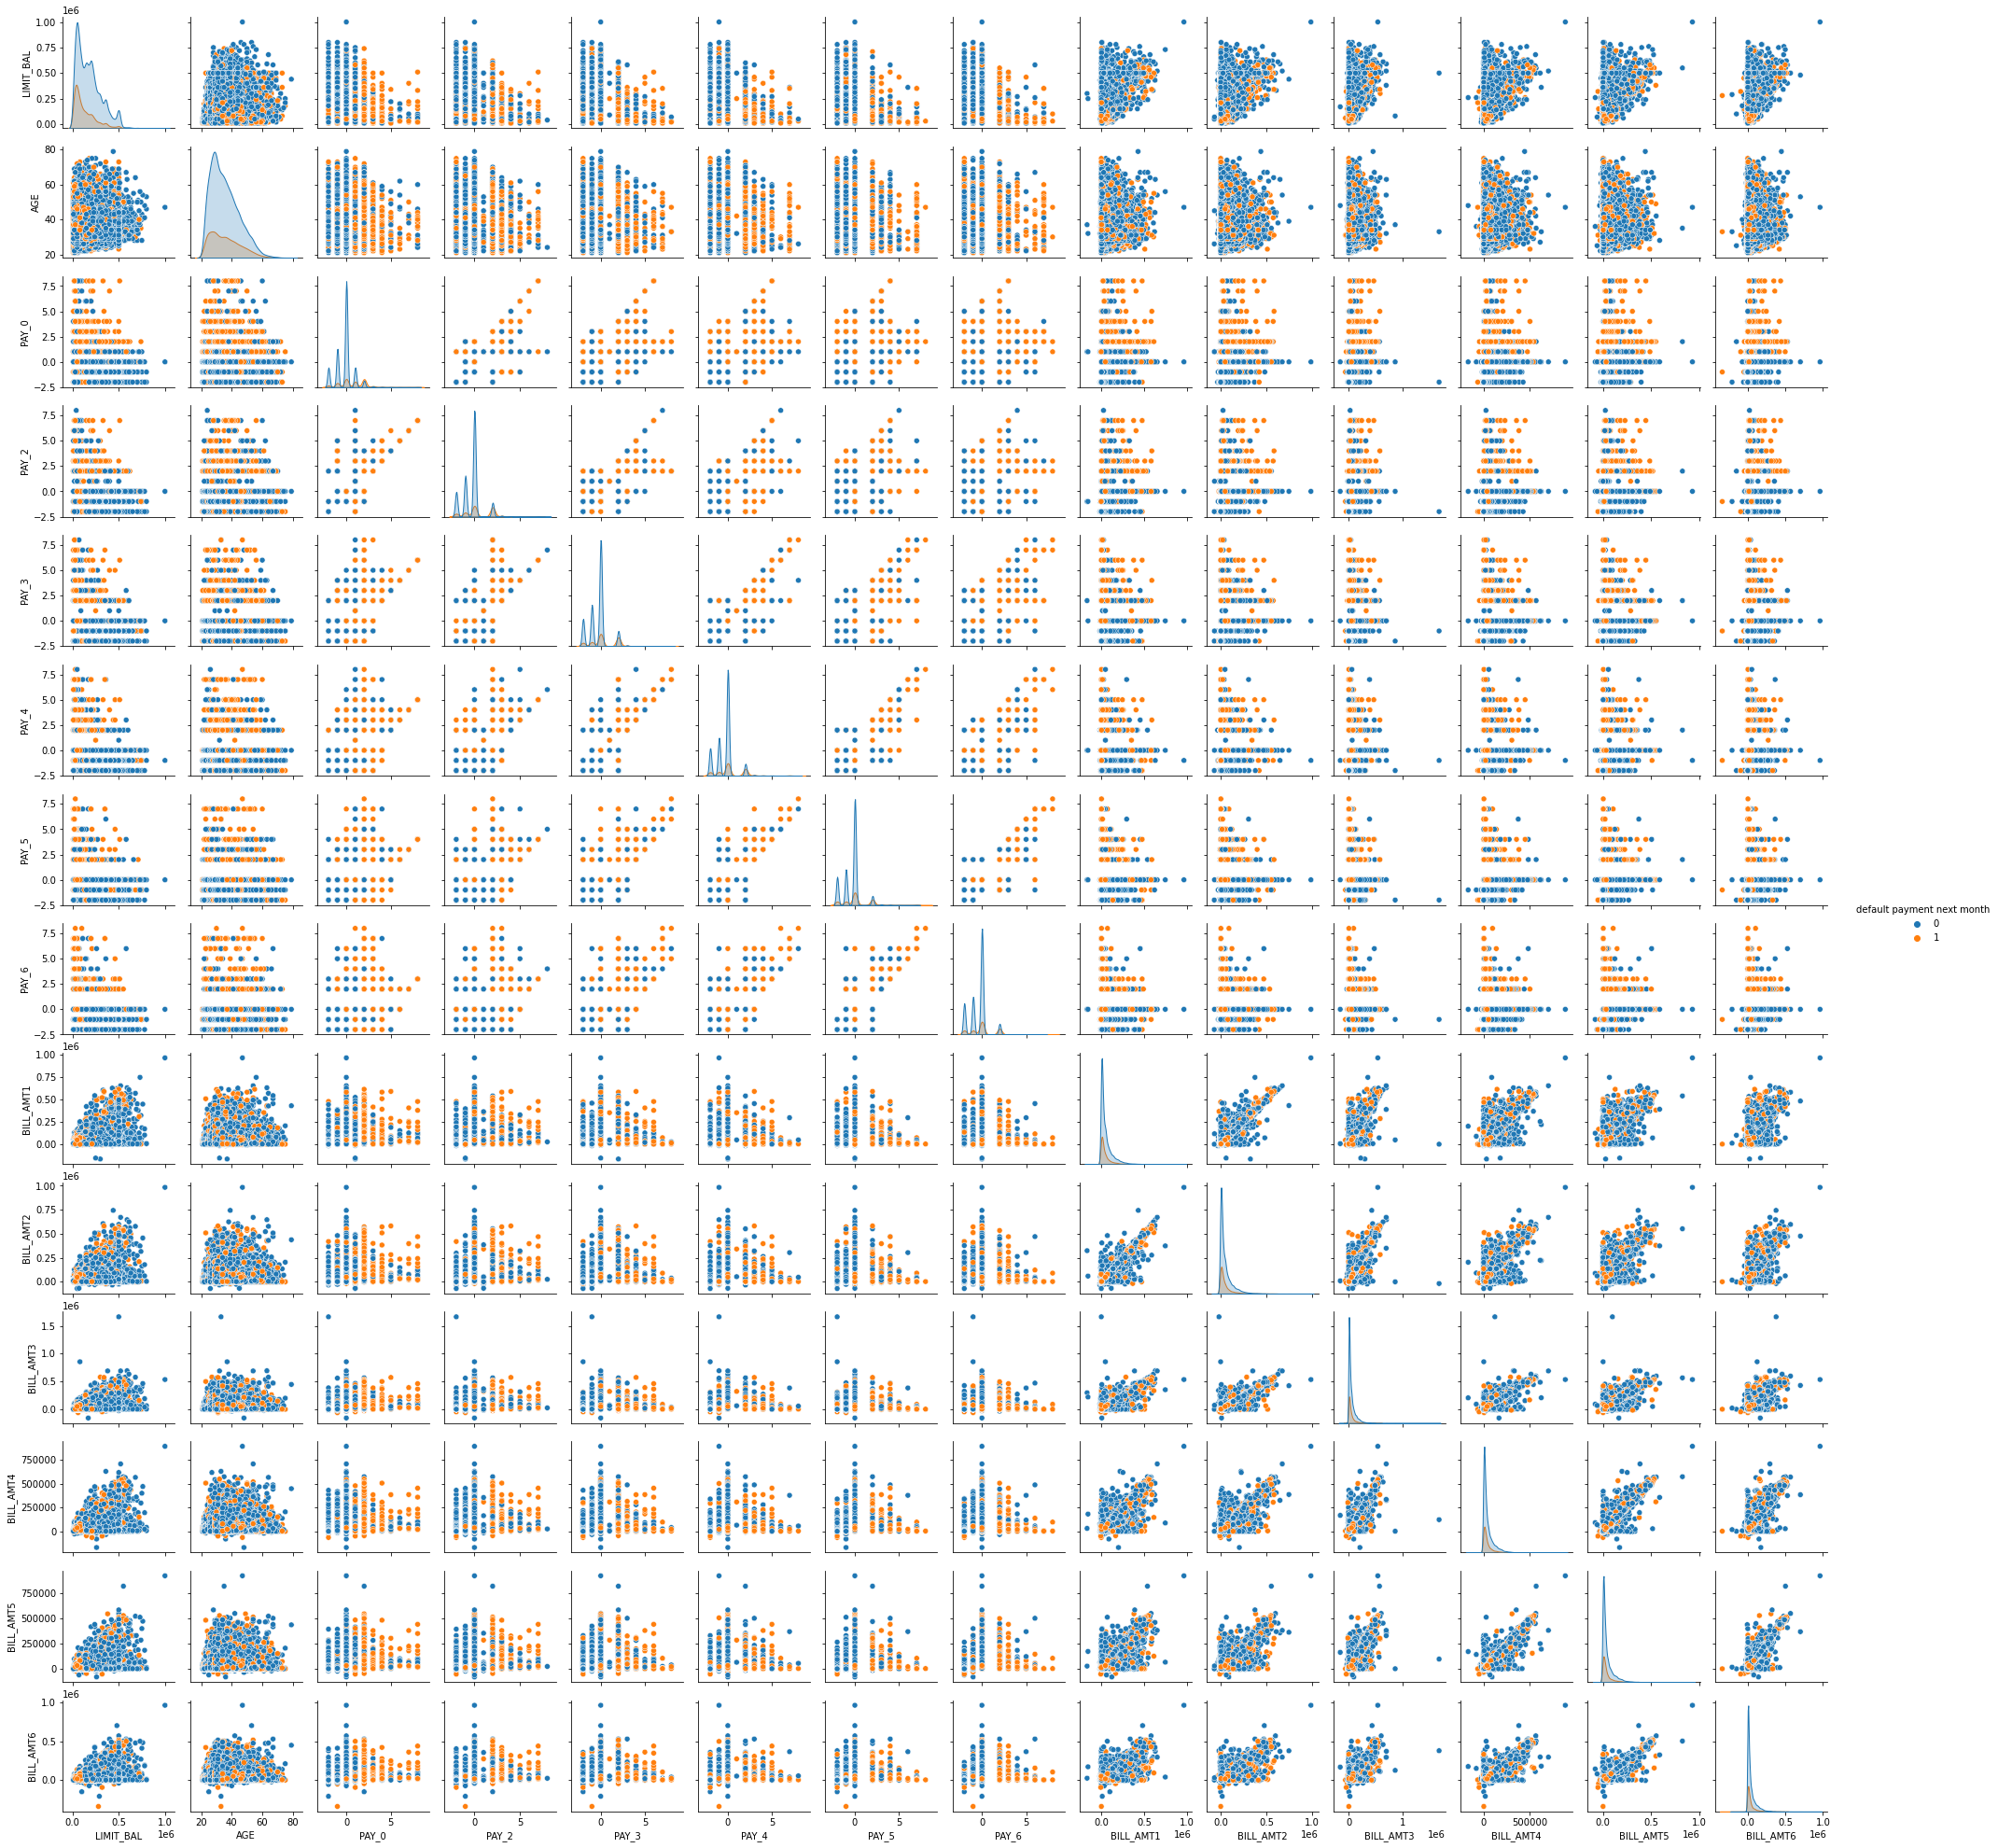

In [91]:
sns.pairplot(df_sub_corr1, hue="default payment next month", height=2)